In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
x_vals = np.array([x[0 : 3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [3]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [4]:
train_indeces = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace = False)
test_indeces = np.array(list(set(range(len(x_vals))) - set(train_indeces)))

In [5]:
x_vals_train = x_vals[train_indeces]
y_vals_train = y_vals[train_indeces]
x_vals_test = x_vals[test_indeces]
y_vals_test = y_vals[test_indeces]

In [6]:
def normalize_cols(m):
    col_max = m.max(axis = 0)
    col_min = m.min(axis = 0)
    return (m - col_min) / (col_max - col_min)

In [7]:
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_train = np.nan_to_num(normalize_cols(x_vals_test))

In [8]:
batch_size = 50
x_data = tf.placeholder(shape = [None, 3], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [9]:
hidden_layer_nodes = 10

In [10]:
A1 = tf.Variable(tf.random_normal(shape = [3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape = [hidden_layer_nodes]))
A2 = tf.Variable(tf.random_normal(shape = [hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape = [1]))

In [11]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

In [12]:
loss = tf.reduce_mean(tf.square(y_target - final_output))

In [13]:
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
loss_vec = []
test_loss = []

In [15]:
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size = batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict = {x_data : rand_x, y_target : rand_y})
    temp_loss = sess.run(loss, feed_dict = {x_data:rand_x, y_target:rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict = {x_data:x_vals_test, y_target : np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i + 1) % 50 == 0:
        print('#' + str(i + 1) + '. Loss = ' + str(temp_loss))

#50. Loss = 1.9521325
#100. Loss = 1.3978075
#150. Loss = 1.4061949
#200. Loss = 1.3874092
#250. Loss = 1.2162735
#300. Loss = 0.8917934
#350. Loss = 0.85643506
#400. Loss = 1.1179909
#450. Loss = 0.6773246
#500. Loss = 0.7796428
#550. Loss = 0.93856514
#600. Loss = 1.035626
#650. Loss = 0.8670333
#700. Loss = 0.78980273
#750. Loss = 0.96623594
#800. Loss = 1.002782
#850. Loss = 0.8695349
#900. Loss = 0.93028307
#950. Loss = 0.946054
#1000. Loss = 0.65489507


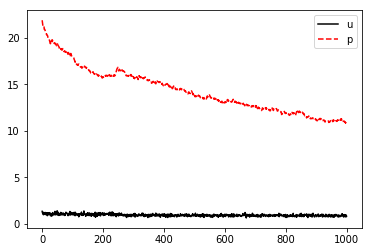

In [16]:
plt.plot(loss_vec, 'k-', label = 'training loss')
plt.plot(test_loss, 'r--', label = 'test loss')
plt.legend('upper right')

In [18]:
loss_vec

[1.336091,
 1.1759809,
 1.1096556,
 1.0991579,
 0.9689957,
 1.2323627,
 1.1849029,
 1.1419326,
 1.1615492,
 1.0723745,
 0.98029774,
 1.2083327,
 1.1694026,
 1.1577044,
 1.041598,
 1.1833762,
 0.9106835,
 0.870344,
 1.1281447,
 1.1821268,
 0.9611669,
 1.1620675,
 1.1492975,
 1.0313905,
 1.062294,
 1.1957783,
 0.95670843,
 0.86813253,
 0.91631746,
 1.0221806,
 0.84847194,
 1.0608584,
 0.8413986,
 0.956976,
 1.1881881,
 1.1999978,
 1.0745806,
 0.9775205,
 0.9382729,
 1.0664715,
 1.0683687,
 1.1639221,
 1.3322607,
 0.9631615,
 1.0458632,
 1.0877454,
 0.9719748,
 1.1260101,
 1.1670828,
 1.3971874,
 1.3111848,
 1.1226059,
 0.91368365,
 1.2192714,
 1.0848767,
 0.89272404,
 1.0119073,
 0.9372395,
 1.0543582,
 0.95044684,
 1.1260791,
 1.221404,
 0.95859957,
 1.0312599,
 1.0591513,
 1.1541106,
 0.9501271,
 1.0732031,
 1.0711473,
 1.1394666,
 1.1414322,
 1.0316561,
 0.91044587,
 0.9912542,
 0.8894961,
 1.0582293,
 0.93123096,
 1.099025,
 1.2406752,
 1.156121,
 1.1368939,
 1.1345886,
 1.0875139,
 